<a href="https://colab.research.google.com/github/BrianKipngeno/Twitter_Sentiment_Analysis-/blob/main/Twitter_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import the Standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

DATA PREPROCESSING

In [4]:
#Load the dataset
data=pd.read_csv('/content/MeTooHate.csv')
data.head()

,status_id,text,created_at,favorite_count,retweet_count,location,followers_count,friends_count,statuses_count,category
0,1046207313588236290,"Entitled, obnoxious, defensive, lying weasel. ...",2018-09-30T01:17:15Z,5.0,1.0,"McAllen, TX",2253.0,2303.0,23856.0,0.0
1,1046207328113086464,Thank you and for what you did for the women...,2018-09-30T01:17:19Z,5.0,2.0,"Tampa, FL",2559.0,4989.0,19889.0,0.0
2,1046207329589493760,Knitting (s) &amp; getting ready for January 1...,2018-09-30T01:17:19Z,0.0,0.0,"St Cloud, MN",16.0,300.0,9.0,0.0
3,1046207341283168256,Yep just like triffeling women weaponized thei...,2018-09-30T01:17:22Z,1.0,0.0,flyover country,3573.0,3732.0,38361.0,1.0
4,1046207347016826880,"No, the President wants to end movement posin...",2018-09-30T01:17:23Z,0.0,0.0,World,294.0,312.0,7635.0,0.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75436 entries, 0 to 75435
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   status_id        75436 non-null  object 
 1   text             75116 non-null  object 
 2   created_at       75433 non-null  object 
 3   favorite_count   75433 non-null  float64
 4   retweet_count    75433 non-null  float64
 5   location         56658 non-null  object 
 6   followers_count  75432 non-null  float64
 7   friends_count    75432 non-null  float64
 8   statuses_count   75432 non-null  float64
 9   category         75432 non-null  float64
dtypes: float64(6), object(4)
memory usage: 5.8+ MB


In [6]:
data.shape

(75436, 10)

In [7]:
#Checking the null values in the data
data.isna().sum()/len(data)*100

status_id           0.000000
text                0.424201
created_at          0.003977
favorite_count      0.003977
retweet_count       0.003977
location           24.892624
followers_count     0.005303
friends_count       0.005303
statuses_count      0.005303
category            0.005303
dtype: float64

Exploratory Data Analysis

In [9]:
#Create a function to checking the null values in the data with percentagein order wise.

def checking_null_values(df):
    #we creat a for loop that will return which columns have null columns
    na_columns=[col for col in df.columns if df[col].isna().sum()>0]
    # We find the null values in the null columns this values or arranged in ascending format
    na_miss=df[na_columns].isna().sum().sort_values(ascending=False)
    #and this code will be multiplication with 100 covert in to percentage
    ratio=(df[na_columns].isna().sum()/df.shape[0]*100).sort_values(ascending=False)
    # then we finally concat the miss_values and percentge with np.round 2 values and finally we create a data frame
    missing_df=pd.concat([na_miss,np.round(ratio,2)],axis=1,keys=['Null values','Percentage'])
    missing_df=pd.DataFrame(missing_df)
    return missing_df.style.background_gradient(cmap='winter_r')
checking_null_values(data)

,Null values,Percentage
location,18778,24.890000
text,320,0.420000
followers_count,4,0.010000
friends_count,4,0.010000
statuses_count,4,0.010000
category,4,0.010000
created_at,3,0.000000
favorite_count,3,0.000000
retweet_count,3,0.000000


In [10]:
data.columns

Index(['status_id', 'text', 'created_at', 'favorite_count', 'retweet_count',
       'location', 'followers_count', 'friends_count', 'statuses_count',
       'category'],
      dtype='object')

In [11]:
#See the numerical columns in the data
numerical=[col for col in data.columns if data[col].dtype!='object']
numerical

['favorite_count',
 'retweet_count',
 'followers_count',
 'friends_count',
 'statuses_count',
 'category']

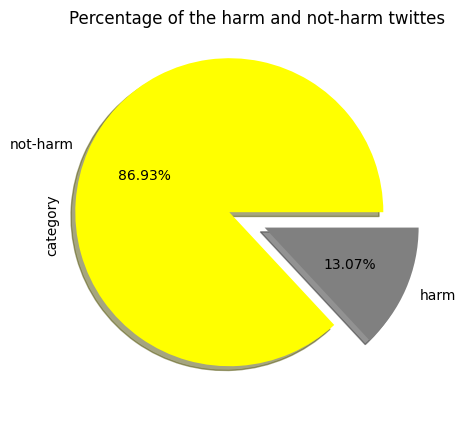

In [12]:
#finding the Percentage of the label data and visulize with pie chart.
#in the pie chart 88% of the data is not horm and and reaming 11% is harmfull tweets.
data['category'].value_counts()\
.sort_values(ascending=False)\
.plot(kind='pie',explode=[0.2,0.05],
    labels=['not-harm','harm'],
    colors=['yellow','gray'],
    autopct='%1.2f%%',
    shadow=True,title="Percentage of the harm and not-harm twittes",figsize=(16,5))
plt.show()

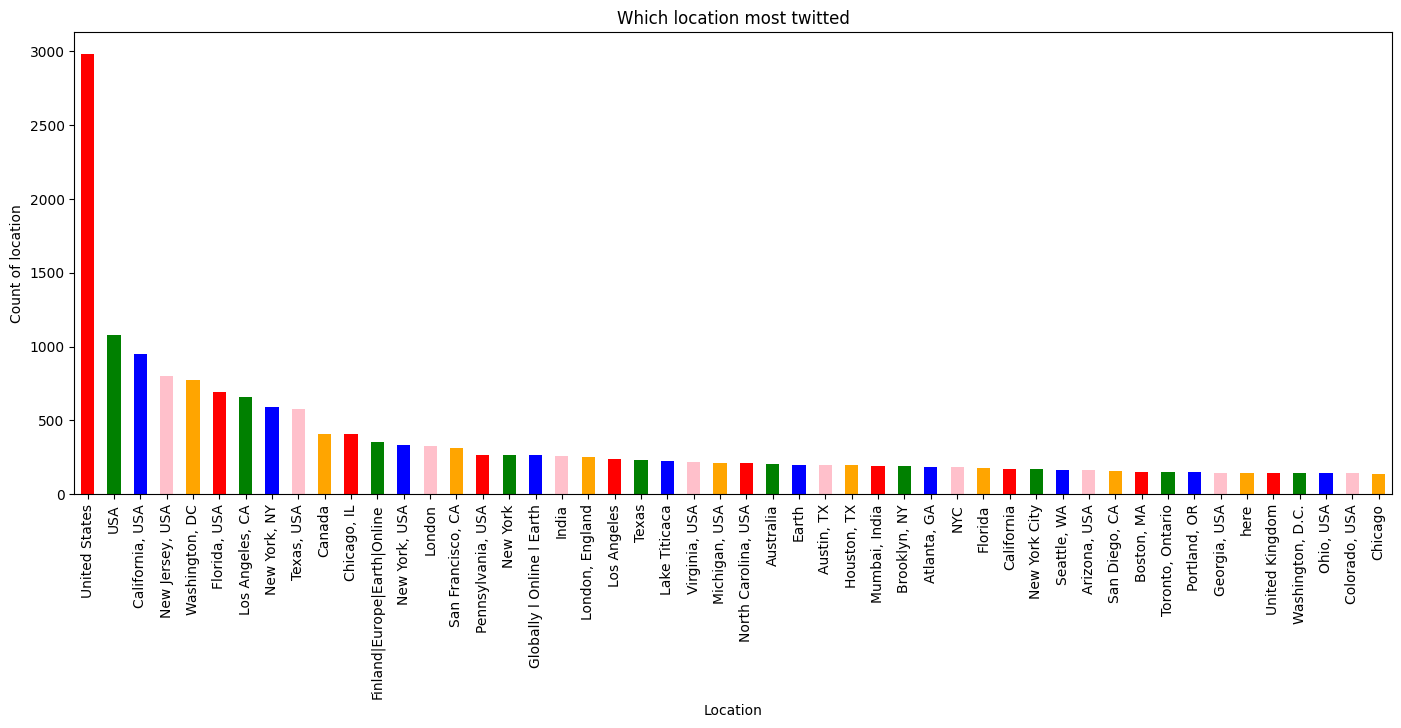

In [13]:
#To visualize the top 50 countrys most twitted
data['location'].value_counts()[:50]\
.sort_values(ascending=False)\
.plot(kind='bar',title="Which location most twitted",figsize=(17,6),color=['red','green','blue','pink','orange'])
plt.xlabel("Location")
plt.ylabel("Count of location")
plt.show()

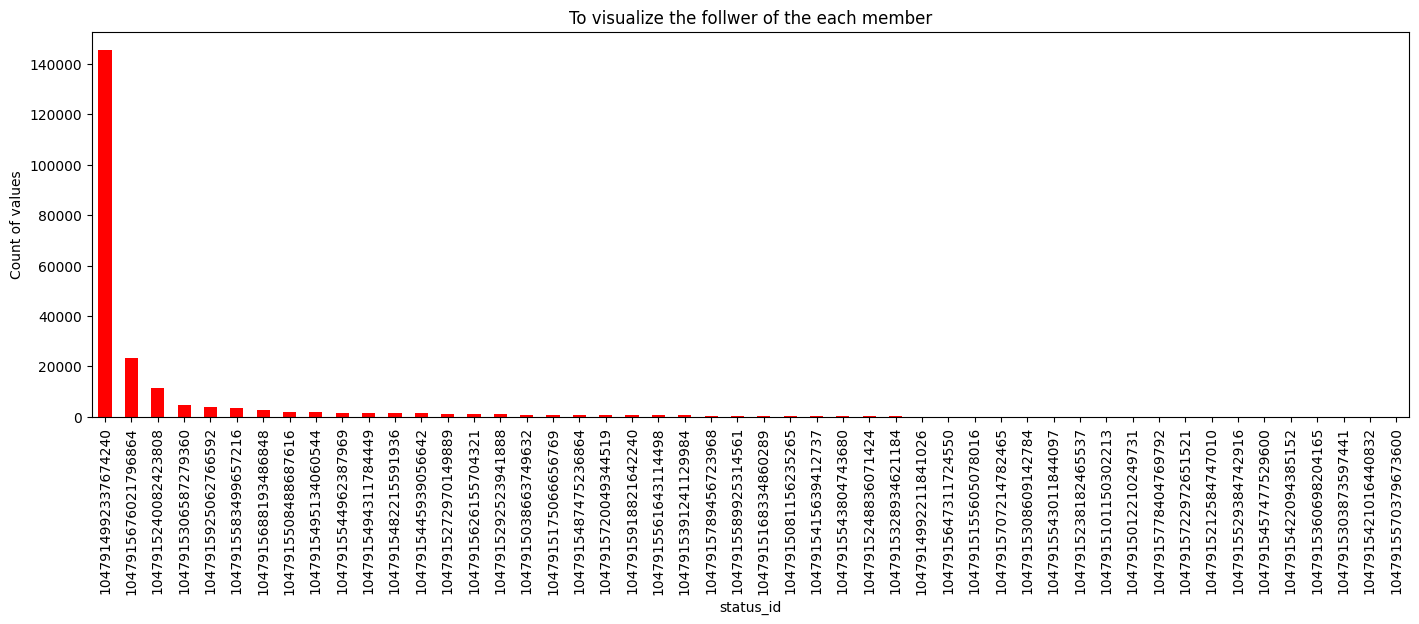

In [14]:
data.groupby(['status_id'])['followers_count'].sum()[:50]\
.sort_values(ascending=False)\
.plot(kind='bar',figsize=(17,5),title="To visualize the follwer of the each member",color='r')
plt.xlabel("status_id")
plt.ylabel("Count of values")
plt.show()

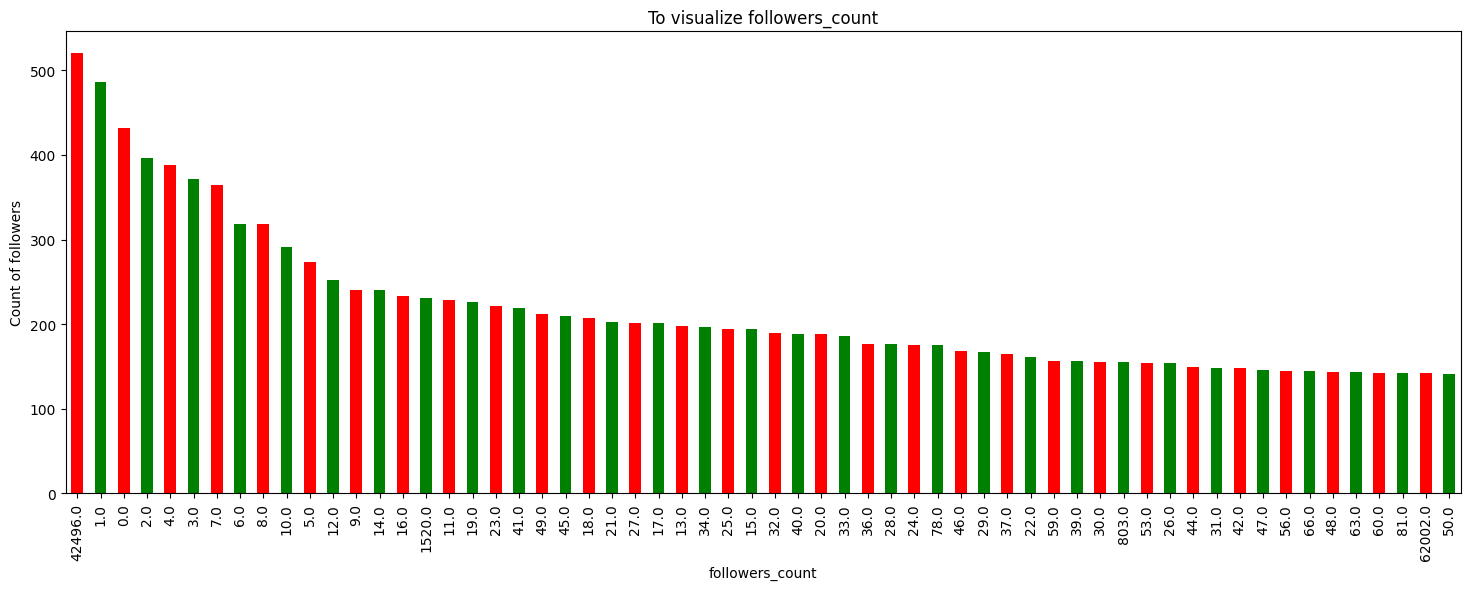

In [15]:
# To visualize the followers_count in the data
data['followers_count'].value_counts().sort_values(ascending=False)[:50].plot(kind='bar',figsize=(18,6),title='To visualize followers_count',color=['red','green'])
plt.xlabel('followers_count')
plt.ylabel('Count of followers')
plt.show()

In [16]:
data.head()

,status_id,text,created_at,favorite_count,retweet_count,location,followers_count,friends_count,statuses_count,category
0,1046207313588236290,"Entitled, obnoxious, defensive, lying weasel. ...",2018-09-30T01:17:15Z,5.0,1.0,"McAllen, TX",2253.0,2303.0,23856.0,0.0
1,1046207328113086464,Thank you and for what you did for the women...,2018-09-30T01:17:19Z,5.0,2.0,"Tampa, FL",2559.0,4989.0,19889.0,0.0
2,1046207329589493760,Knitting (s) &amp; getting ready for January 1...,2018-09-30T01:17:19Z,0.0,0.0,"St Cloud, MN",16.0,300.0,9.0,0.0
3,1046207341283168256,Yep just like triffeling women weaponized thei...,2018-09-30T01:17:22Z,1.0,0.0,flyover country,3573.0,3732.0,38361.0,1.0
4,1046207347016826880,"No, the President wants to end movement posin...",2018-09-30T01:17:23Z,0.0,0.0,World,294.0,312.0,7635.0,0.0


In [22]:
follwer_max=data['followers_count'].max()
follwer_min=data['followers_count'].min()
friend_max=data['friends_count'].max()
friend_min=data['friends_count'].min()
print(f'the highest followers in the data is {follwer_max} ')
print(f'the highest followers in the data is {follwer_min}')
print(f'the highest friends in the data is {friend_max}')
print(f'the highest friends in the data is {friend_min}')

the highest followers in the data is 42183602.0 
the highest followers in the data is 0.0
the highest friends in the data is 682639.0
the highest friends in the data is 0.0


NATURAL LANGUAGE PROCESSING


In [23]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [24]:
#Remove the Punctuations from the data with sample question
harm=data[data['category']==1]
q1=harm['text'].values[0]
q1

'Yep just like triffeling women weaponized their poon!! Wonder if Kamala Harris ever extorted Willy Brown after throwing the poon on him, oh yeh, that how she got her first job me too is a JOKE! '

In [25]:
#We remove extra keywords in the data with sample question
test_punc_remove=[char for char in q1 if char not in string.punctuation]
test_punc_removed=''.join(test_punc_remove)
test_punc_removed

'Yep just like triffeling women weaponized their poon Wonder if Kamala Harris ever extorted Willy Brown after throwing the poon on him oh yeh that how she got her first job me too is a JOKE '

In [26]:
test_punc_removes=[]
for char in q1:
    if char not in string.punctuation:
        test_punc_removes.append(char)
punc_remove=''.join(test_punc_removes)
punc_remove

'Yep just like triffeling women weaponized their poon Wonder if Kamala Harris ever extorted Willy Brown after throwing the poon on him oh yeh that how she got her first job me too is a JOKE '

In [27]:
def punction_remove(text):
    if isinstance(text, float):
        return text
    else:
        test_punc_remove=[char for char in text if char not in string.punctuation]
        test_punc_removed=''.join(test_punc_remove)
        return test_punc_removed
data['text']=data['text'].apply(punction_remove)

In [28]:
data['text']

0        Entitled obnoxious defensive lying weasel This...
1        Thank you  and  for what you did for the women...
2        Knitting s amp getting ready for January 19 20...
3        Yep just like triffeling women weaponized thei...
4        No the President wants to end  movement posing...
                               ...                        
75431    Respect to the wonderful folks who marched on ...
75432                                    one beer brewer 🍺
75433    RT  It started with the New York Times report ...
75434                             has arrived in India 👏👏👏
75435    Men in power Men committing crimes with impuni...
Name: text, Length: 75436, dtype: object

In [30]:
 import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [31]:
#Remove the stopwords from the data
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
stopwords=','.join(stopwords.words('english'))
stopwords

"i,me,my,myself,we,our,ours,ourselves,you,you're,you've,you'll,you'd,your,yours,yourself,yourselves,he,him,his,himself,she,she's,her,hers,herself,it,it's,its,itself,they,them,their,theirs,themselves,what,which,who,whom,this,that,that'll,these,those,am,is,are,was,were,be,been,being,have,has,had,having,do,does,did,doing,a,an,the,and,but,if,or,because,as,until,while,of,at,by,for,with,about,against,between,into,through,during,before,after,above,below,to,from,up,down,in,out,on,off,over,under,again,further,then,once,here,there,when,where,why,how,all,any,both,each,few,more,most,other,some,such,no,nor,not,only,own,same,so,than,too,very,s,t,can,will,just,don,don't,should,should've,now,d,ll,m,o,re,ve,y,ain,aren,aren't,couldn,couldn't,didn,didn't,doesn,doesn't,hadn,hadn't,hasn,hasn't,haven,haven't,isn,isn't,ma,mightn,mightn't,mustn,mustn't,needn,needn't,shan,shan't,shouldn,shouldn't,wasn,wasn't,weren,weren't,won,won't,wouldn,wouldn't"

Tokenization with nltk libaries


In [33]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [34]:
tokenize=word_tokenize(punc_remove)
tokenize

['Yep',
 'just',
 'like',
 'triffeling',
 'women',
 'weaponized',
 'their',
 'poon',
 'Wonder',
 'if',
 'Kamala',
 'Harris',
 'ever',
 'extorted',
 'Willy',
 'Brown',
 'after',
 'throwing',
 'the',
 'poon',
 'on',
 'him',
 'oh',
 'yeh',
 'that',
 'how',
 'she',
 'got',
 'her',
 'first',
 'job',
 'me',
 'too',
 'is',
 'a',
 'JOKE']

Stopwords Removel Process

In [35]:
def stopwords_english(text):
    return [word for word in text if word.lower() not in stopwords]
stopwords_remove=stopwords_english(tokenize)
stopwords_remove

['Yep',
 'like',
 'triffeling',
 'women',
 'weaponized',
 'poon',
 'Wonder',
 'Kamala',
 'Harris',
 'ever',
 'extorted',
 'Willy',
 'Brown',
 'throwing',
 'poon',
 'oh',
 'yeh',
 'got',
 'first',
 'job',
 'JOKE']

In [36]:
stemmer=SnowballStemmer(language='english')
stemming_process=[stemmer.stem(word) for word in stopwords_remove]
stemming_process

['yep',
 'like',
 'triffel',
 'women',
 'weapon',
 'poon',
 'wonder',
 'kamala',
 'harri',
 'ever',
 'extort',
 'willi',
 'brown',
 'throw',
 'poon',
 'oh',
 'yeh',
 'got',
 'first',
 'job',
 'joke']

In [37]:
def stemming(text):
    stemming=[stemmer.stem(word) for word in stopwords_remove]
    stemming=''.join(stemming)
    return stemming
# lemmatizer = WordNetLemmatizer()
# q1_lem=lemmatizer.lemmatize(stemming_process)
# q1_lem

In [38]:
data.head()

,status_id,text,created_at,favorite_count,retweet_count,location,followers_count,friends_count,statuses_count,category
0,1046207313588236290,Entitled obnoxious defensive lying weasel This...,2018-09-30T01:17:15Z,5.0,1.0,"McAllen, TX",2253.0,2303.0,23856.0,0.0
1,1046207328113086464,Thank you and for what you did for the women...,2018-09-30T01:17:19Z,5.0,2.0,"Tampa, FL",2559.0,4989.0,19889.0,0.0
2,1046207329589493760,Knitting s amp getting ready for January 19 20...,2018-09-30T01:17:19Z,0.0,0.0,"St Cloud, MN",16.0,300.0,9.0,0.0
3,1046207341283168256,Yep just like triffeling women weaponized thei...,2018-09-30T01:17:22Z,1.0,0.0,flyover country,3573.0,3732.0,38361.0,1.0
4,1046207347016826880,No the President wants to end movement posing...,2018-09-30T01:17:23Z,0.0,0.0,World,294.0,312.0,7635.0,0.0


In [44]:
#def text_preprocessing(text):
    #Word_tokenize
    #words=word_tokenize(text)
    #Stop words removal
    #words=[word for word in words if word not in stopwords]
    #Stemming process
    #words=[stemmer.stem(word) for word in words]
    #Lemmatization
#     words=[lemmatizer.lemmatize(word) for word in words]
    # Convert all words to lowercase
    #words = [word.lower() for word in words]
    #words=' '.join(words)
    #return words

#data['text'] = data['text'].apply(text_preprocessing)